In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.precision', 18)
np.set_printoptions(precision=18)

In [3]:
def upload_df(file_path, start_basis_size = 900):
  df = pd.read_csv(file_path)
  df['Basis Size'] = df['Basis Size'].astype(int)

  for i in range(df['Basis Size'].values[0],start_basis_size + 1,100):
    df.drop(df[df['Basis Size'] == i].index, inplace = True)

  return df

In [4]:
def upload_df1(file_path):
  df = pd.read_csv(file_path)
  df['basis size'] = df['basis size'].astype(int)

  return df[2:]

In [5]:

def graph(df: pd.DataFrame, n_cols: int = 4):
    """
    Generates and displays a grid of plots for each feature in a DataFrame
    against the 'basis size' column.

    Args:
        df (pd.DataFrame): The input DataFrame. It must contain a column
                           named 'basis size' (case-insensitive).
        n_cols (int): The number of columns to use in the plot grid.
                      Defaults to 4.
    """
    # Create a copy to avoid changing the original DataFrame
    df_plot = df.copy()

    # Standardize column names to lowercase for consistency
    df_plot.columns = [col.lower() for col in df_plot.columns]

    # Check for the required 'basis size' column
    if 'basis size' not in df_plot.columns:
        raise ValueError("Input DataFrame must contain a 'basis size' column.")

    # Prepare the data and identify features to plot
    df_plot['basis size'] = df_plot['basis size'].astype(int)
    features = sorted([col for col in df_plot.columns if col != 'basis size'])
    n_features = len(features)

    # Handle the case of no features to plot
    if n_features == 0:
        print("No feature columns found to plot.")
        return

    # Calculate the required number of rows for the grid
    n_rows = (n_features + n_cols - 1) // n_cols

    # Create the figure and subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3.5 * n_rows), sharex=True)
    fig.suptitle('Features vs. Basis Size', fontsize=16, y=1.03)

    # Flatten the axes array for easy, single-loop iteration
    axes = axes.flatten()

    # Plot each feature against the basis size
    for i, feature in enumerate(features):
        ax = axes[i]
        ax.scatter(df_plot['basis size'], df_plot[feature], marker='o')

        # Format titles and labels for readability
        ax.set_title(feature.replace('_', ' ').title())
        ax.set_xlabel('Basis Size')
        ax.set_ylabel('Value')
        ax.grid(True, linestyle='--', alpha=0.6)

    # Clean up by removing any empty, unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout to prevent plot elements from overlapping
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

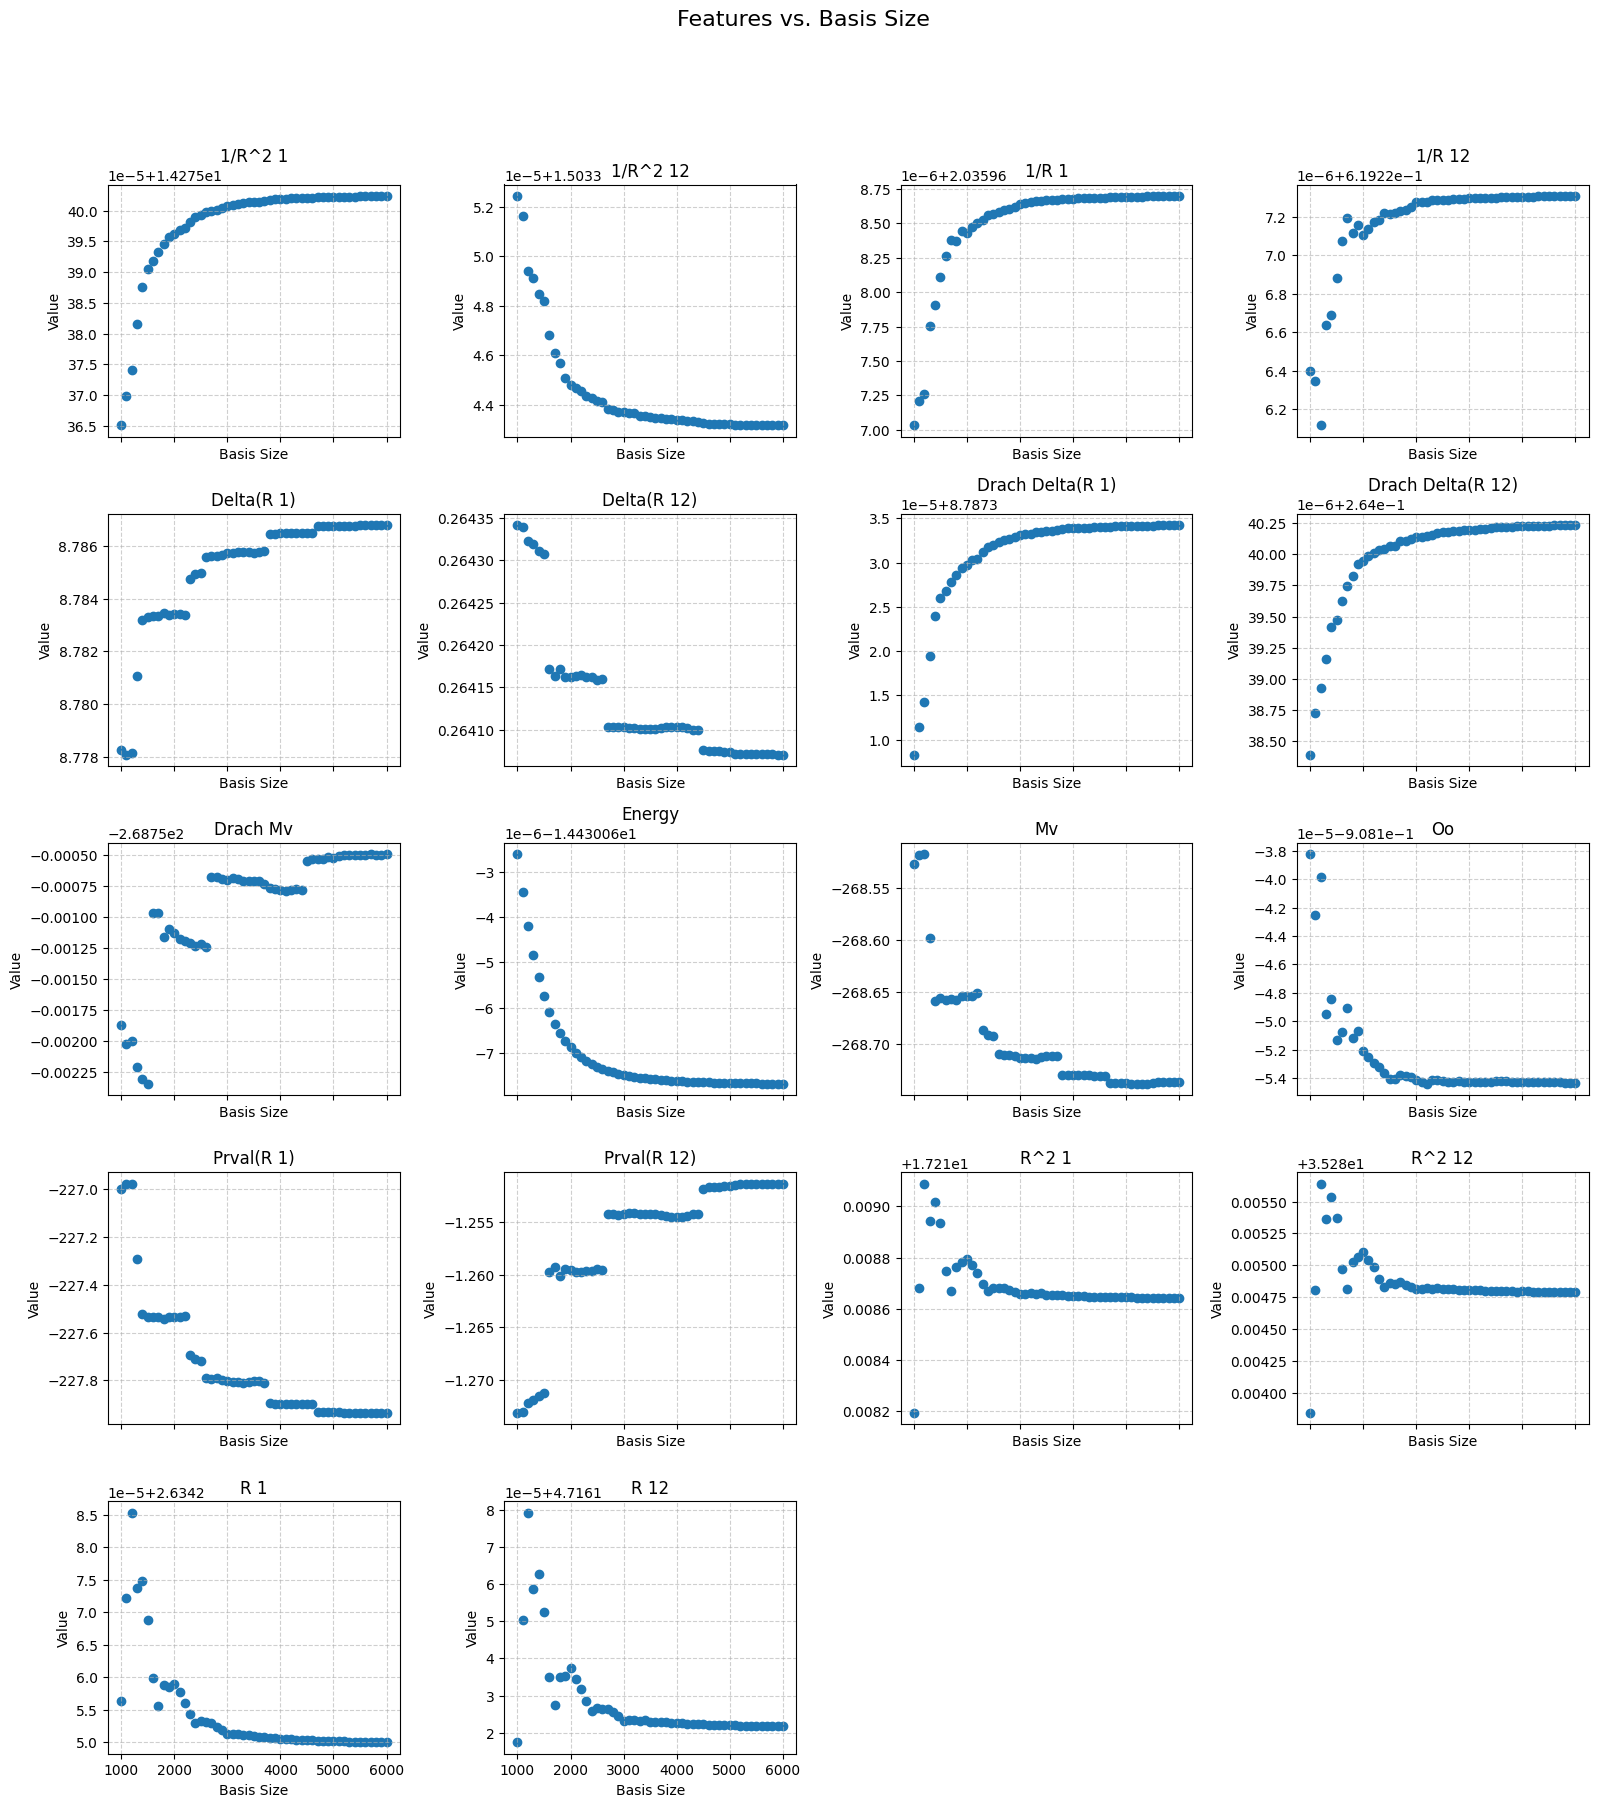

In [71]:
graph(be_3se_init)

In [7]:
li_2se = upload_df('/home/aldiyar/extrapolation/large-dataset/Li_2Se.csv')
li_2se = li_2se.drop(columns = ['SO1', 'SO2'])
li_2se = li_2se.rename(columns= {'Basis Size': 'basis size'})


In [8]:
li_2se_inf = li_2se.loc[li_2se['basis size'] == max(li_2se['basis size'])]
li_2se_init = li_2se.iloc[:-1]

In [9]:

be_1se = upload_df('/home/aldiyar/extrapolation/large-dataset/Be_1Se.csv')
be_1se = be_1se.drop(columns = ['SO1', 'SO2'])
be_1se = be_1se.rename(columns= {'Basis Size': 'basis size'})
be_1se_inf = be_1se.loc[be_1se['basis size'] == max(be_1se['basis size'])]
be_1se_init = be_1se.iloc[:-1]

In [10]:


be_3po = upload_df('/home/aldiyar/extrapolation/large-dataset/Be_3Po.csv')
be_3po = be_3po.drop(columns = ['SO1', 'SO2'])
be_3po = be_3po.rename(columns= {'Basis Size': 'basis size'})
be_3po_inf = be_3po.loc[be_3po['basis size'] == max(be_3po['basis size'])]
be_3po_init = be_3po.iloc[:-1]

In [11]:
be_1po = upload_df('/home/aldiyar/extrapolation/large-dataset/Be_1Po.csv')
be_1po = be_1po.drop(columns = ['SO1', 'SO2'])
be_1po = be_1po.rename(columns= {'Basis Size': 'basis size'})
be_1po_inf = be_1po.loc[be_1po['basis size'] == max(be_1po['basis size'])]
be_1po_init = be_1po.iloc[:-1]

In [12]:
li_2po = upload_df('/home/aldiyar/extrapolation/large-dataset/Li_2Po.csv')
li_2po = li_2po.drop(columns = ['SO1', 'SO2'])
li_2po = li_2po.rename(columns= {'Basis Size': 'basis size'})
li_2po_inf = li_2po.loc[li_2po['basis size'] == max(li_2po['basis size'])]
li_2po_init = li_2po.iloc[:-1]

In [13]:
be_3se = upload_df('/home/aldiyar/extrapolation/large-dataset/Be_3Se.csv')
be_3se = be_3se.drop(columns = ['SO1', 'SO2'])
be_3se = be_3se.rename(columns= {'Basis Size': 'basis size'})
be_3se_inf = be_3se.loc[be_3se['basis size'] == max(be_3se['basis size'])]
be_3se_init = be_3se.iloc[:-1]

In [15]:
import importlib, extrapolator
importlib.reload(extrapolator)


<module 'extrapolator' from '/home/aldiyar/extrapolation/src/extrapolator.py'>

In [16]:
be_3se_inf

,basis size,Energy,MV,drach_MV,OO,1/r^2_1,1/r^2_12,1/r_1,1/r_12,r_1,r_12,r^2_1,r^2_12,delta(r_1),delta(r_12),drach_delta(r_1),drach_delta(r_12),prval(r_1),prval(r_12)
60,15000,-14.430067702600199553,-268.747345434091982952,-268.750278122663985414,-0.908154324680072955,14.275402589026500166,1.503343092914859902,2.035968704557970188,0.619227311534123026,2.634249795269040018,4.716121494183759921,17.218639809009200548,35.284786321316097712,8.787221294451079245,0.264046815750369979,8.787334355899050209,0.264040249925802994,-227.999613034079999352,-1.248719423993229993


Available columns to analyze:
- Energy
- MV
- drach_MV
- OO
- 1/r^2_1
- 1/r^2_12
- 1/r_1
- 1/r_12
- r_1
- r_12
- r^2_1
- r^2_12
- delta(r_1)
- delta(r_12)
- drach_delta(r_1)
- drach_delta(r_12)
- prval(r_1)
- prval(r_12)
------------------------------

--- Fitting Exponential Model ---
Optimizing Exponential weights using known value: -14.43006770
  Best weight power: 1 with distance 1.75e-08

--- Fitting Exponential SQ Model ---
Optimizing Exponential SQ weights using known value: -14.43006770
  Best weight power: 3 with distance 2.74e-10

--- Fitting Power Law Model ---
Optimizing Power Law weights using known value: -14.43006770
  Best weight power: 2 with distance 8.84e-10

FINAL RESULTS FOR 'Energy'

Exponential Model:
  Extrapolated Limit (C): -14.430067685060214089
  Total Uncertainty:      ± 0.000000000000000000
  Difference from known:  0.000000017539985464

Exponential √x Model:
  Extrapolated Limit (C): -14.430067702873751401
  Total Uncertainty:      ± 0.000000000000000000


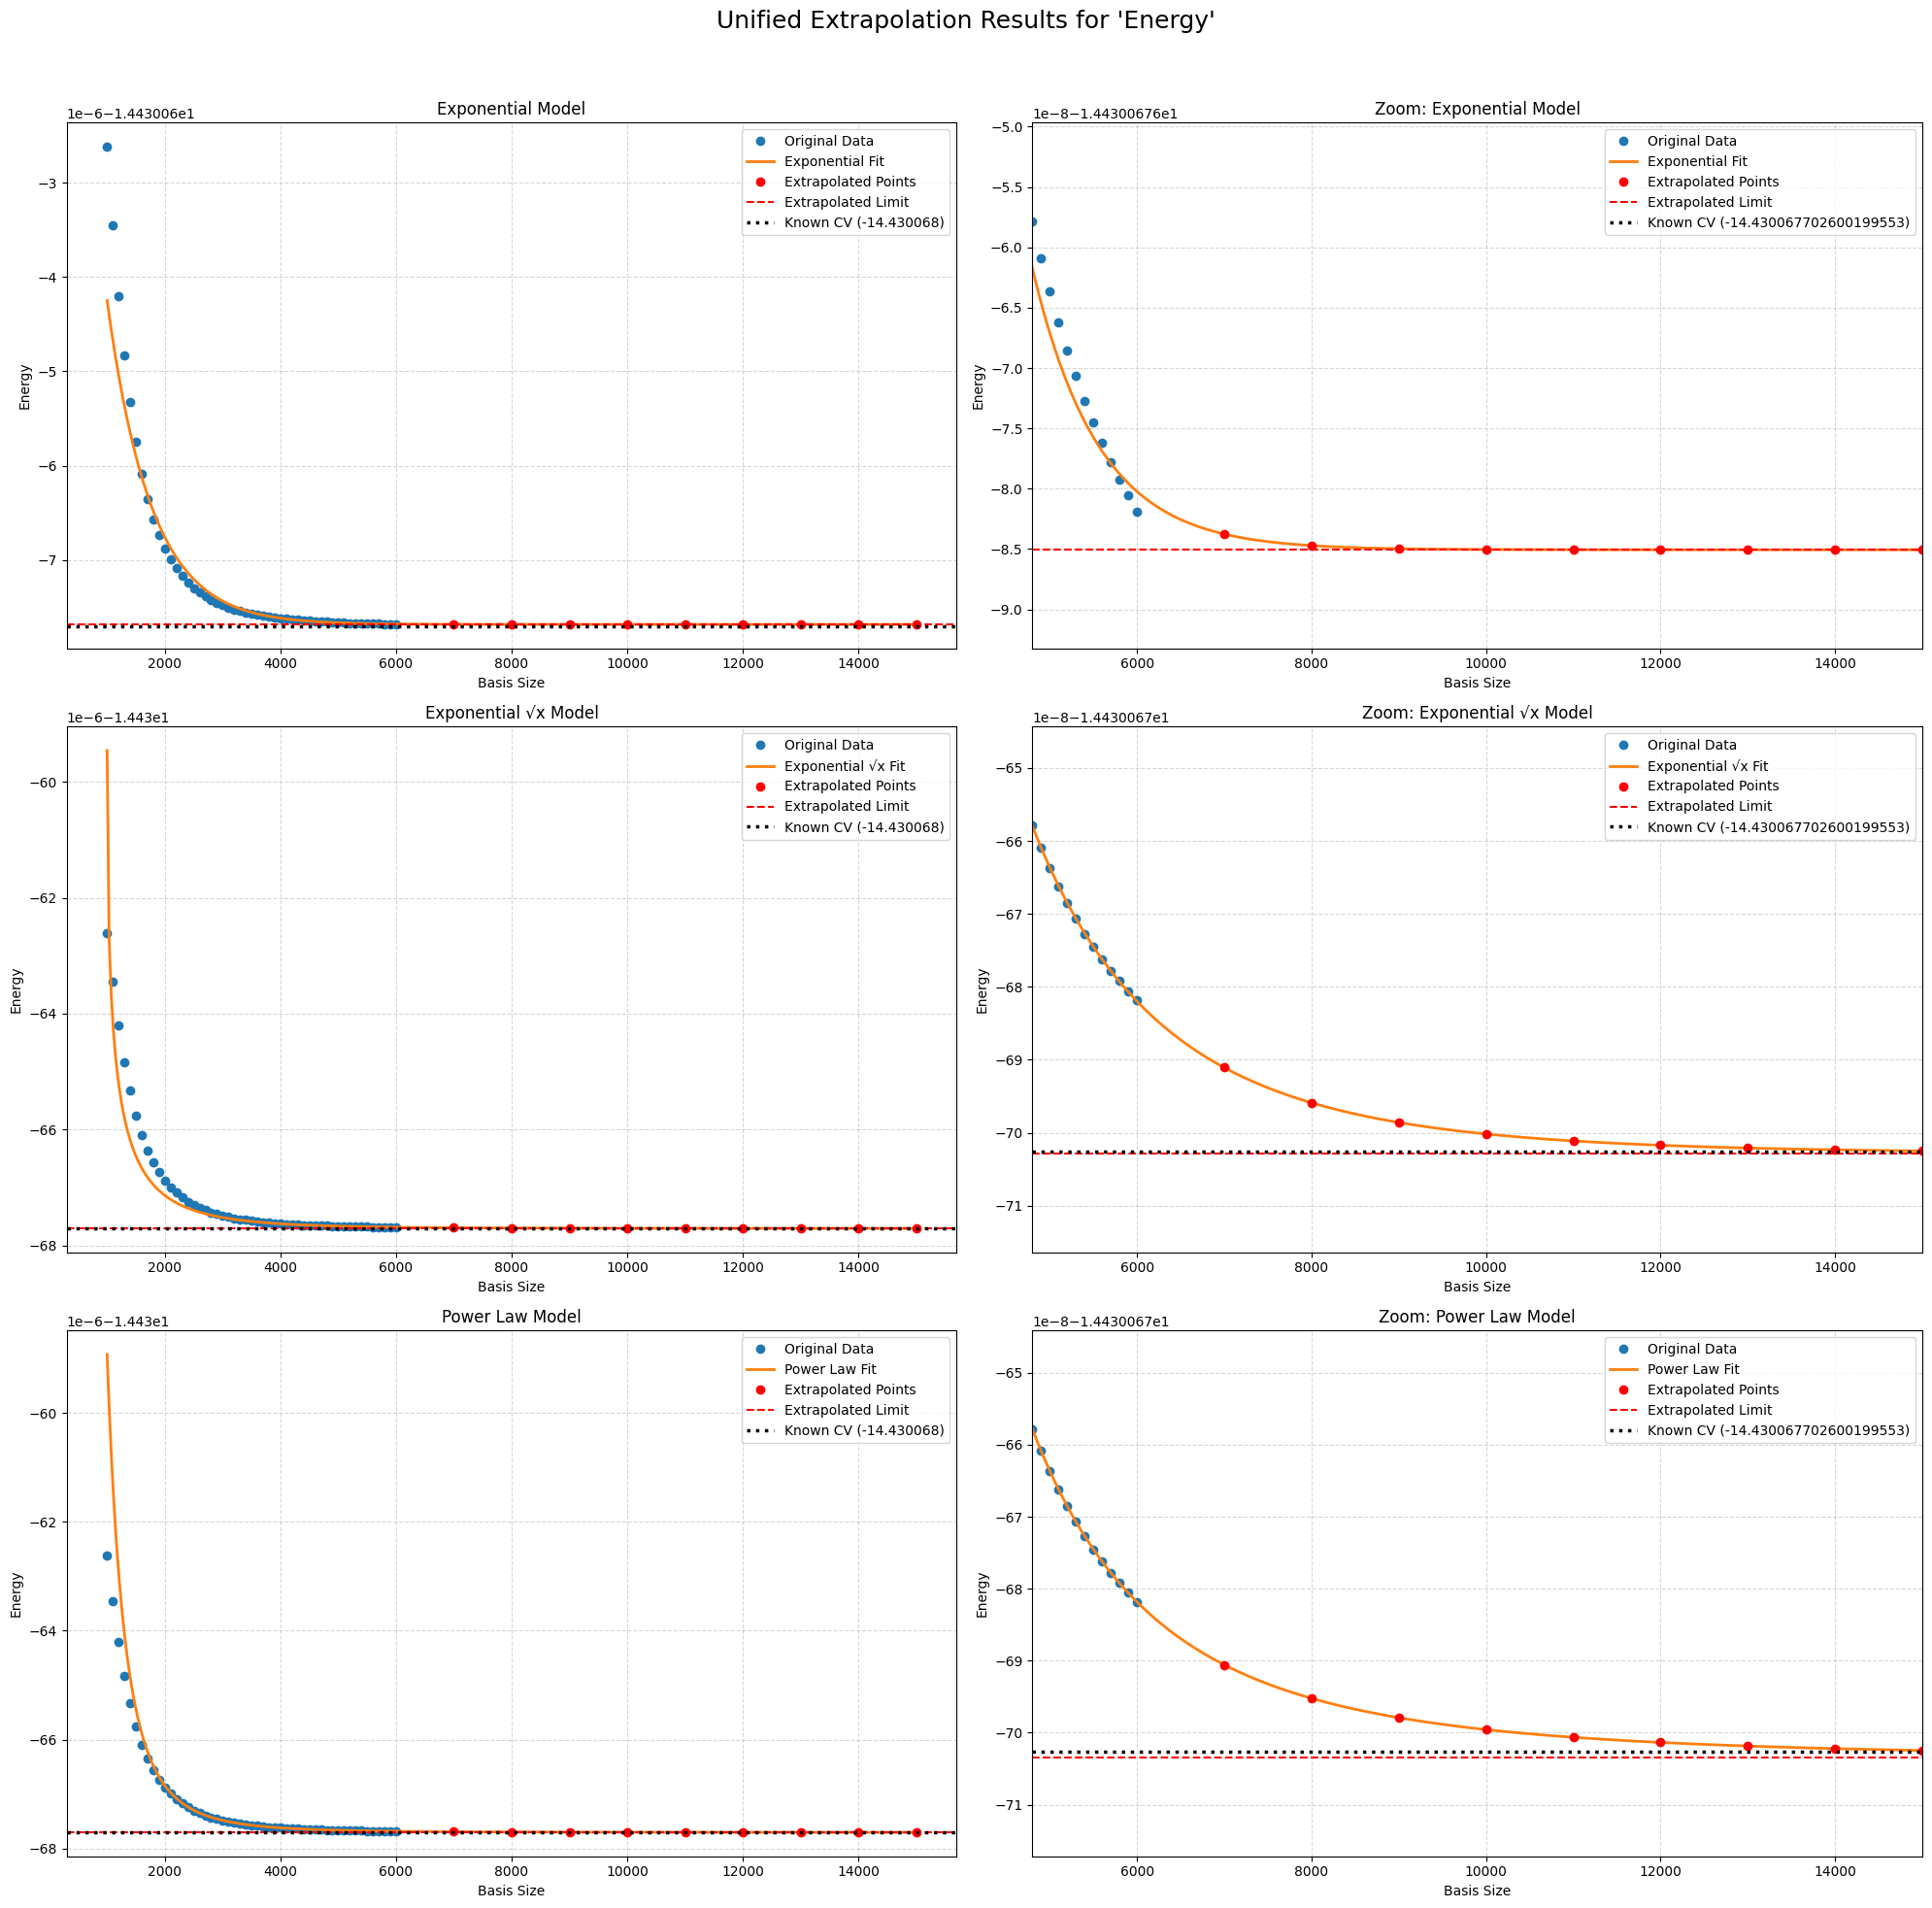

In [17]:
extrapolator.unified_extrapolator(be_3se_init).fit()

In [164]:
y = be_3se_init['delta(r_12)'].values

y = np.array([0.264341438112004, 0.264339067770233, 0.26432255305904 ,
       0.26431867509351 , 0.264311545296642, 0.264307531072276,
       0.264171438829778, 0.264163620439298, 0.264171766170665,
       0.264161686728287, 0.264162388444027, 0.264163895864341,
       0.264164187267583, 0.264162120681949, 0.264161841538984,
       0.264159084322246, 0.26415961304169 , 0.264103083669322,
       0.264102676808078, 0.264102939050672, 0.264102523727845,
       0.2641014823178  , 0.264101773907363, 0.264101266571546,
       0.264100838830149, 0.264101002726371, 0.264100910350134,
       0.264101678480579, 0.264103001647892, 0.264103108233614,
       0.264103129230427, 0.264103056940769, 0.264101670710475,
       0.264099874686888, 0.264099671376516, 0.264075943725038,
       0.264074577544007, 0.264074461531763, 0.264074476134448,
       0.264073392620169, 0.264073333544167, 0.264071714963143,
       0.264071347395802, 0.264071174702556, 0.264070910379616,
       0.264070791972441, 0.264070704405761, 0.26407064971426 ,
       0.264070633936641, 0.26407059450597 , 0.264070517220646])

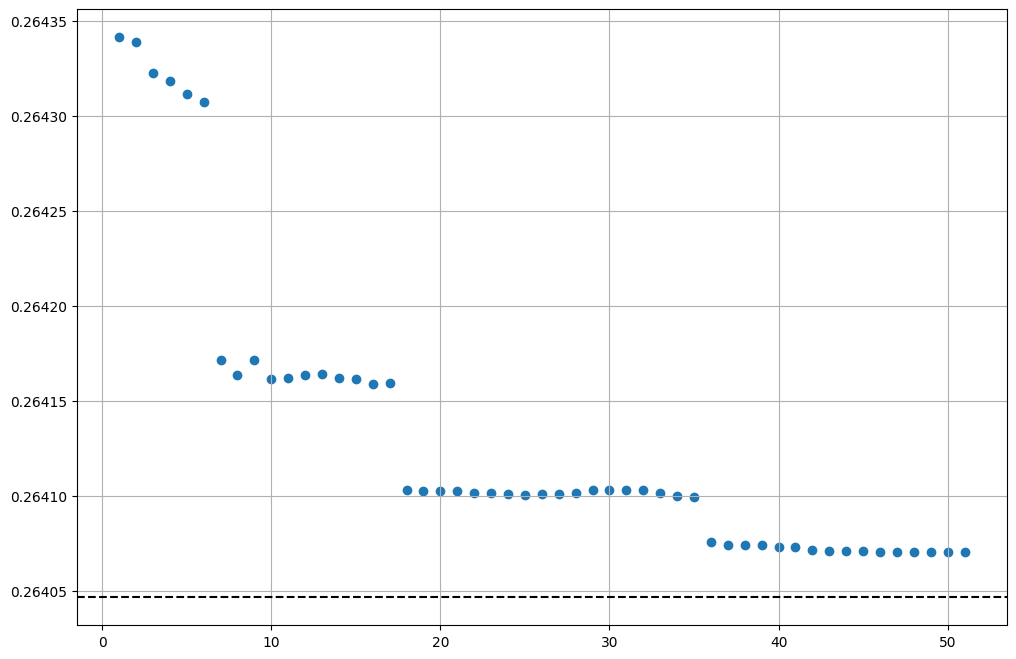

In [165]:
x = np.arange(1,len(y)+1,1)

plt.figure(figsize=(12,8))
plt.scatter(x,y)
plt.axhline(0.264046815750369979, color = 'black', linestyle= 'dashed')
plt.grid(True)
plt.show()

In [166]:
diff_y = np.diff(y)
diff_x = np.arange(1,len(diff_y)+1,1)

# plt.figure(figsize=(12,8))
# plt.scatter(diff_x, diff_y)
# plt.grid(True)
# plt.show()


In [ ]:


# last known data point
y_last = y[-1]

# last detected jump magnitudes (negative values)
j1, j2, j3 = -1.3609224249799823e-04, -5.6529372367997155e-05, -2.3727651478011591e-05

# initialize with known jumps
jumps = [j1, j2, j3]

# assume jumps happen every 10 steps (tune to your case)
jump_interval = 15  

y_points = []
current_y = y_last
current_jump = j3

for i in range(1, 51):  # extrapolate 50 steps
    if i % jump_interval == 0:
        # compute ratio from all available jumps so far
        ratios = [jumps[k] / jumps[k-1] for k in range(1, len(jumps)) if jumps[k-1] != 0]
        mean_r = np.mean(ratios) if ratios else 1.0

        # apply jump
        current_jump *= mean_r
        current_y += current_jump

        # store this jump
        jumps.append(current_jump)

    y_points.append(current_y)

y_points = np.array(y_points)
y_points


array([0.264070517220646  , 0.264070517220646  , 0.264070517220646  ,
       0.264070517220646  , 0.264070517220646  , 0.264070517220646  ,
       0.264070517220646  , 0.264070517220646  , 0.264070517220646  ,
       0.264070517220646  , 0.264070517220646  , 0.264070517220646  ,
       0.264070517220646  , 0.264070517220646  , 0.26406060955416316,
       0.26406060955416316, 0.26406060955416316, 0.26406060955416316,
       0.26406060955416316, 0.26406060955416316, 0.26406060955416316,
       0.26406060955416316, 0.26406060955416316, 0.26406060955416316,
       0.26406060955416316, 0.26406060955416316, 0.26406060955416316,
       0.26406060955416316, 0.26406060955416316, 0.2640564725305211 ,
       0.2640564725305211 , 0.2640564725305211 , 0.2640564725305211 ,
       0.2640564725305211 , 0.2640564725305211 , 0.2640564725305211 ,
       0.2640564725305211 , 0.2640564725305211 , 0.2640564725305211 ,
       0.2640564725305211 , 0.2640564725305211 , 0.2640564725305211 ,
       0.26405647253